In [78]:
import networkx as nx

In [79]:
def girvan_newman(G, most_valuable_edge=None):
    if G.number_of_edges() == 0:
        yield tuple(nx.connected_components(G))
        return
    if most_valuable_edge is None:
        def most_valuable_edge(G):
            betweenness = nx.edge_betweenness_centrality(G)
            return max(betweenness, key=betweenness.get)
    g = G.copy().to_undirected()
    g.remove_edges_from(nx.selfloop_edges(g))
    while g.number_of_edges() > 0:
        yield _without_most_central_edges(g, most_valuable_edge)
        
def _without_most_central_edges(G, most_valuable_edge):
    original_num_components = nx.number_connected_components(G)
    num_new_components = original_num_components
    while num_new_components <= original_num_components:
        edge = most_valuable_edge(G)
        G.remove_edge(*edge)
        new_components = tuple(nx.connected_components(G))
        num_new_components = len(new_components)
    return new_components

In [80]:
g = nx.read_edgelist('abc.txt',create_using=nx.Graph(),nodetype=int)
print(nx.info(g))
comp = girvan_newman(g)
#communities = tuple(sorted(c) for c in next(comp))
communities = [sorted(c) for c in next(comp)]
print("No. of communities: "+str(len(communities)))
for i in range(len(communities)):
    print()
    print("Community "+str(i+1))
    print(communities[i])
    print()

Name: 
Type: Graph
Number of nodes: 900
Number of edges: 1000
Average degree:   2.2222
No. of communities: 9

Community 1
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


Community 2
[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 

Name: 
Type: Graph
Number of nodes: 2237
Number of edges: 3094
Average degree:   2.7662
no of communities 29.0


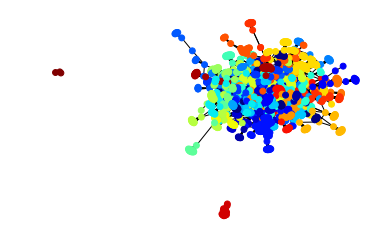

In [91]:
import community
import networkx as nx
import matplotlib.pyplot as plt

# Replace this with your networkx graph loading depending on your format !
#G = nx.erdos_renyi_graph(30, 0.05)
G = nx.read_edgelist('abc.txt',create_using=nx.Graph(),nodetype=int)
print(nx.info(G))

#first compute the best partition
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
print('no of communities ' + str(size))

pos = nx.spring_layout(G)

values = [partition.get(node) for node in G.nodes()]
plt.axis("off")
nx.draw_networkx(G, pos = pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 35, with_labels = False)

#pos = nx.spring_layout(G)
#count = 0.
#for com in set(partition.values()) :
#    count = count + 1.
#    list_nodes = [nodes for nodes in partition.keys()
#                                if partition[nodes] == com]
#    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
#                                node_color = str(count / size))
#
#
#nx.draw_networkx_edges(G, pos)
#plt.show()